In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
from statsmodels.tsa.stattools import adfuller
import random

In [3]:
!pip install yfinance

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Fetch historical data
nse = yf.download("^NSEI", start="2020-01-01")


[*********************100%%**********************]  1 of 1 completed


In [5]:
nse.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


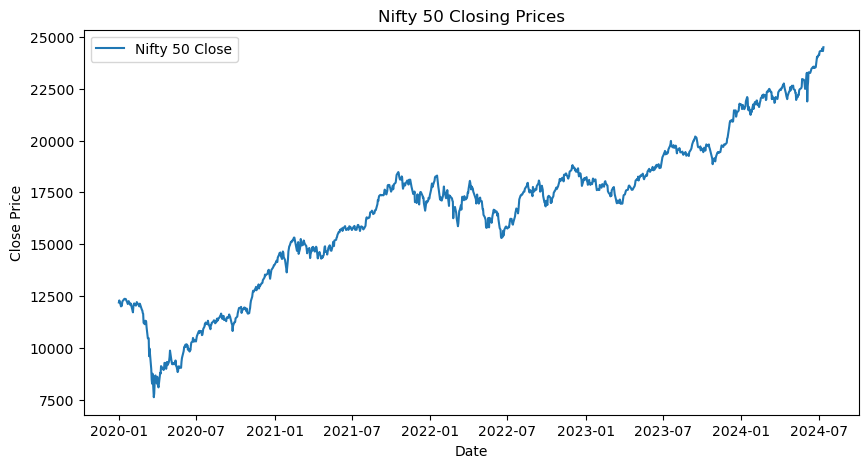

In [6]:
# Plot closing prices
plt.figure(figsize=(10, 5))
plt.plot(nse['Close'], label='Nifty 50 Close')
plt.title('Nifty 50 Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [7]:
# Remove missing values
nifty = nse.dropna()

# Dropping irrelevant columns
nifty = nifty.drop(columns=['Open', 'Adj Close' , 'High' , 'Low' , 'Volume'])

# Display the first few rows of the cleaned data
print(nifty.head())

                   Close
Date                    
2020-01-01  12182.500000
2020-01-02  12282.200195
2020-01-03  12226.650391
2020-01-06  11993.049805
2020-01-07  12052.950195


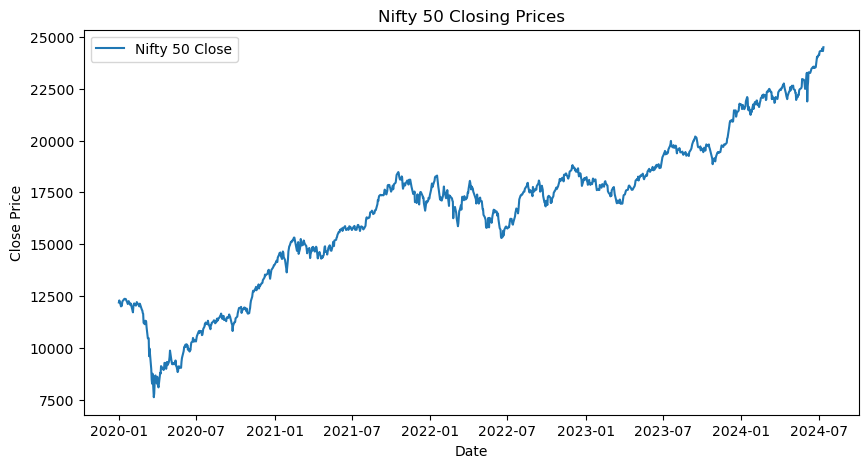

ADF Statistic: 0.23816607434531695
p-value: 0.9743227834683487
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [8]:
# Plot Closing Prices
plt.figure(figsize=(10, 5))
plt.plot(nifty['Close'], label='Nifty 50 Close')
plt.title('Nifty 50 Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Perform ADF Test
result = adfuller(nifty['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.3f}')
    
#not stationary data

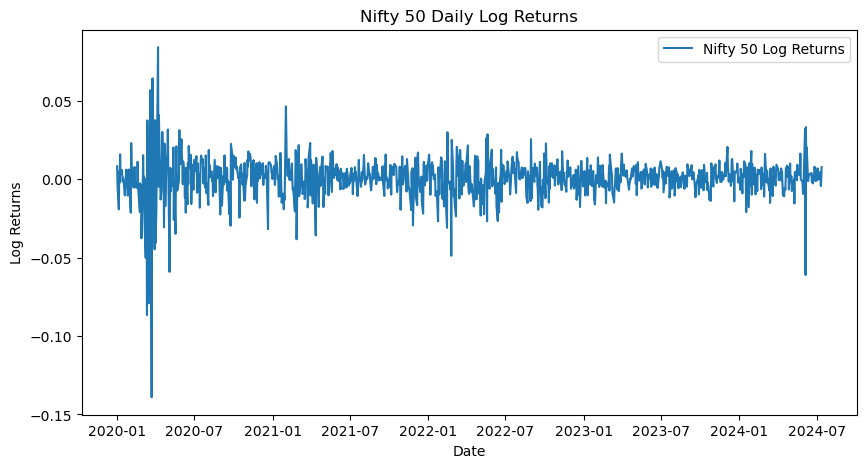

ADF Statistic: -9.802388533783827
p-value: 5.947490189687065e-17
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [9]:
niftylogprice = np.log(nifty['Close'])

# Calculate Daily Log Returns
niftylogreturns = niftylogprice.diff().dropna()

# Plot Daily Log Returns
plt.figure(figsize=(10, 5))
plt.plot(niftylogreturns, label='Nifty 50 Log Returns')
plt.title('Nifty 50 Daily Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

# Perform ADF Test
result = adfuller(niftylogreturns)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.3f}')
    
#stationary data

In [10]:
niftylogprice = np.log(nifty['Close'])

# Calculate the split index
split_index = len(niftylogprice) - len(niftylogprice) // 10

# Split the data into train and test sets
train = niftylogprice[:split_index]
test = niftylogprice[split_index:]


In [11]:
train.head()

Date
2020-01-01    9.407756
2020-01-02    9.415906
2020-01-03    9.411373
2020-01-06    9.392083
2020-01-07    9.397065
Name: Close, dtype: float64

In [12]:
test.tail()

Date
2024-07-08    10.099077
2024-07-09    10.103698
2024-07-10    10.099237
2024-07-11    10.098888
2024-07-12    10.106516
Name: Close, dtype: float64

In [13]:
from pmdarima import auto_arima
from statsmodels.stats.diagnostic import acorr_ljungbox

In [14]:
# Fit ARIMA model
model2020 = auto_arima(train, d=1, stepwise=False, approximation=False, trace=True)

# Summary of the ARIMA model
print(model2020.summary())

# Ljung-Box test on residuals
residuals = model2020.resid()
lb_test = acorr_ljungbox(residuals, lags=[20], return_df=True)

print("\nLjung-Box Test:")
print(lb_test)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=-5926.265, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=-5927.813, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=-5926.469, Time=0.31 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=-5925.576, Time=0.69 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=-5924.712, Time=0.49 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=-5945.679, Time=0.72 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=-5927.986, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=-5926.165, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=-5924.454, Time=0.53 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=-5932.806, Time=0.91 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=-5929.199, Time=1.20 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=-5926.369, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=-5924.408, Time=0.65 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=-5922.435, Time=0.36 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=-5931.531, Time=0.79

In [15]:
nse2021 = yf.download("^NSEI", start="2021-01-01")

[*********************100%%**********************]  1 of 1 completed


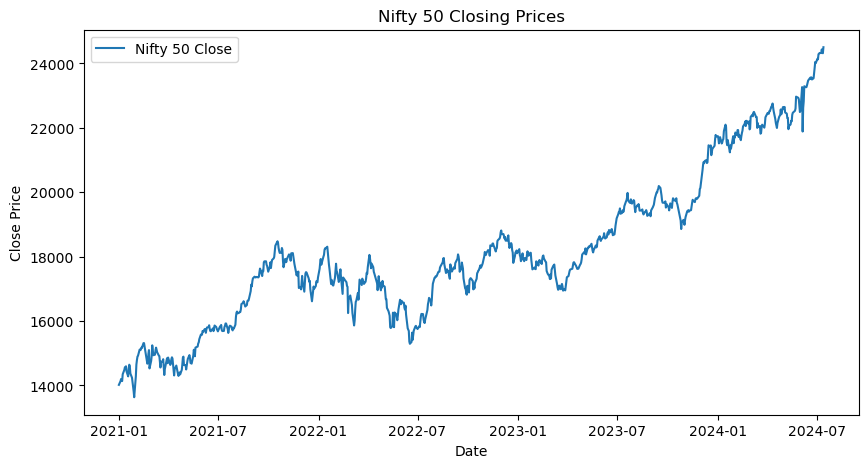

In [16]:
# Plot closing prices
plt.figure(figsize=(10, 5))
plt.plot(nse2021['Close'], label='Nifty 50 Close')
plt.title('Nifty 50 Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

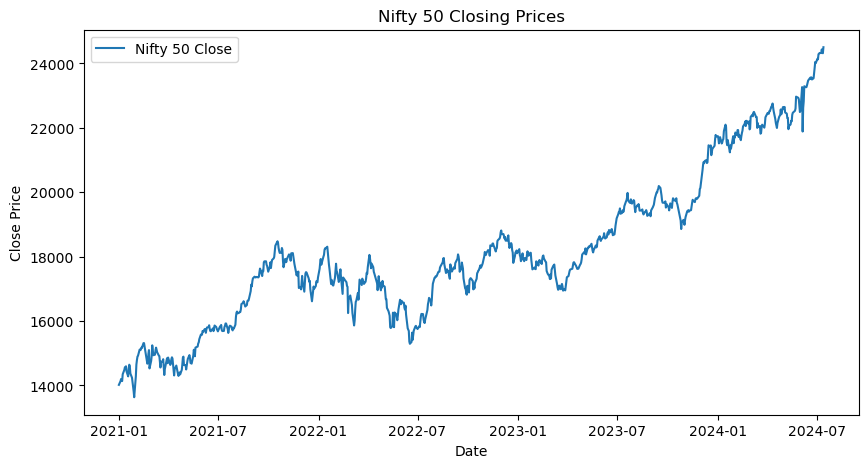

ADF Statistic: 0.13223780140117355
p-value: 0.9681944320119893
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


In [17]:
#Dropping null values
nifty2021 = nse2021.dropna()

# Plot Closing Prices
plt.figure(figsize=(10, 5))
plt.plot(nifty2021['Close'], label='Nifty 50 Close')
plt.title('Nifty 50 Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Perform ADF Test
result = adfuller(nifty2021['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.3f}')
    
#not stationary data

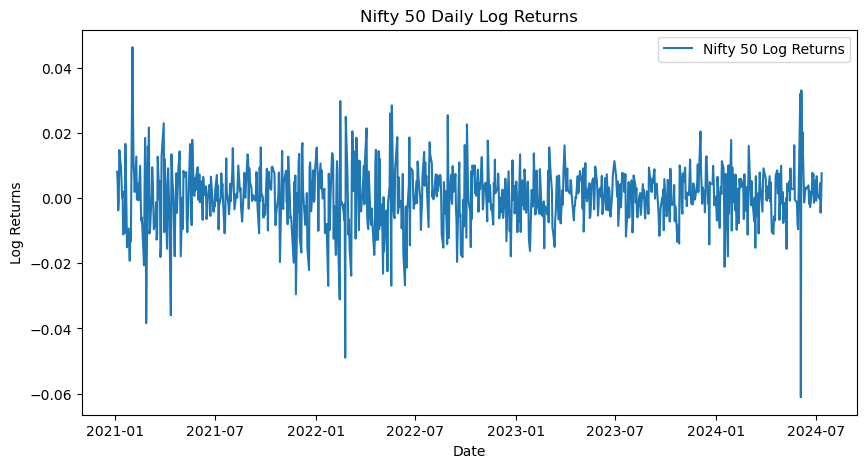

ADF Statistic: -14.91004587492965
p-value: 1.463104653309884e-27
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


In [18]:
niftylogprices2021 = np.log(nifty2021['Close'])

#Calculate Daily Log Returns
niftylogreturns2021 = niftylogprices2021.diff().dropna()

# Plot Daily Log Returns
plt.figure(figsize=(10, 5))
plt.plot(niftylogreturns2021, label='Nifty 50 Log Returns')
plt.title('Nifty 50 Daily Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

# Perform ADF Test
result = adfuller(niftylogreturns2021)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.3f}')
    
#stationary data

# ARIMA Model

In [36]:

# Calculate the split index
split_index21 = len(niftylogprices2021) - len(niftylogprices2021) // 10

# Split the data into train and test sets
train21 = niftylogprices2021[:split_index21]
test21 = niftylogprices2021[split_index21:]


In [37]:
# Fit ARIMA model
model2021 = auto_arima(train21, d=1, stepwise=False, approximation=False, trace=True)

# Summary of the ARIMA model
print(model2021.summary())

# Extract p-values of the coefficients
p_values = model2021.pvalues()
print("P-values of the coefficients:")
print(p_values)

# Ljung-Box test on residuals
residuals21 = model2021.resid()
lb_test21 = acorr_ljungbox(residuals21, lags=[20], return_df=True)

print("\nLjung-Box Test:")
print(lb_test21)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=-5122.307, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=-5122.913, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=-5122.807, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=-5125.809, Time=0.28 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=-5124.876, Time=0.54 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=-5124.164, Time=0.65 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=-5122.652, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=-5120.217, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=-5121.800, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=-5124.341, Time=0.42 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=-5123.126, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=-5123.729, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=-5121.539, Time=0.53 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=-5126.605, Time=0.84 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=-5125.492, Time=0.38

In [38]:
# Extract p-values of the coefficients
p_values = model2021.pvalues()
print("P-values of the coefficients:")
print(p_values)

P-values of the coefficients:
intercept     8.731203e-02
ar.L1         9.303005e-01
ar.L2         2.627871e-11
ma.L1         6.173367e-01
ma.L2         2.126176e-08
sigma2       4.542324e-184
dtype: float64


In [44]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt

# Fit ARIMA model to train data
model2021 = ARIMA(train21, order=(2, 1, 2))  # Adjust order based on your R model
model2021_fit = model2021.fit()

# Using 2021 model to predict future prices (forecast length equivalent to test set length)
forecast2021_result = model2021_fit.get_forecast(steps=len(test21))
forecast2021 = forecast2021_result.predicted_mean
forecast_conf_int = forecast2021_result.conf_int()

# Convert forecasts to original scale if necessary (log-transformed data)
# forecast2021 = np.exp(forecast2021)
# test21 = np.exp(test21)  # Convert test data back to original scale if necessary

# Calculating accuracy metrics for the model
rmse = sqrt(mean_squared_error(test21, forecast2021))
mae = mean_absolute_error(test21, forecast2021)
mape = mean_absolute_percentage_error(test21, forecast2021)

residuals2021 = model2021_fit.resid

# Print accuracy metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')



C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 0.03811117224866548
MAE: 0.02652353769749546
MAPE: 0.002635117886246167


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [45]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

# ARIMA-GARCH

In [47]:
import itertools
import pandas as pd
from arch import arch_model

# Assuming 'residuals' is already defined as the residuals from the ARIMA model

results = []
p_range = q_range = range(0, 6)
pq_combinations = list(itertools.product(p_range, q_range))

for p_garch, q_garch in pq_combinations:
    try:
        garch_model = arch_model(residuals2021, vol='Garch', p=p_garch, q=q_garch)
        garch_fit = garch_model.fit(disp='off')
        log_likelihood = garch_fit.loglikelihood
        num_params = len(garch_fit.params)
        num_obs = len(residuals2021)
        aic = -2 * log_likelihood + 2 * num_params
        aicc = aic + (2 * num_params * (num_params + 1)) / (num_obs - num_params - 1)
        results.append((p_garch, q_garch, log_likelihood, aic, aicc))
    except Exception as e:
        continue

results_df = pd.DataFrame(results, columns=['p_garch', 'q_garch', 'log_likelihood', 'aic', 'aicc'])
best_aic = results_df.loc[results_df['aic'].idxmin()]
p_garch, q_garch = best_aic['p_garch'], best_aic['q_garch']

# Print the best parameters based on the lowest AIC value
print("Best GARCH parameters based on AIC:")
print(f"p_garch: {p_garch}, q_garch: {q_garch}")
print(f"AIC: {best_aic['aic']}")
print(f"AICC: {best_aic['aicc']}")
print(f"Log Likelihood: {best_aic['log_likelihood']}")


C:\Users\divya\anaconda3\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Best GARCH parameters based on AIC:
p_garch: 5.0, q_garch: 2.0
AIC: -4354.0486073001875
AICC: -4353.816049160652
Log Likelihood: 2186.0243036500938


In [48]:
!pip install arch

import matplotlib.pyplot as plt
import scipy.stats as stats
from arch import arch_model


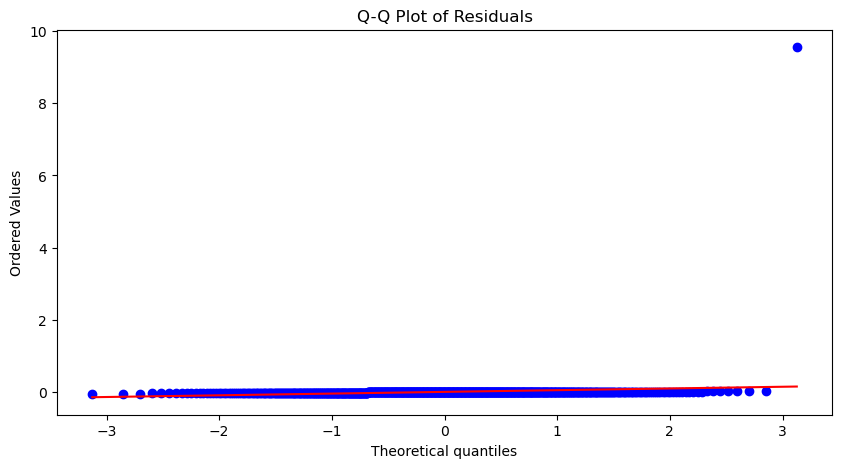

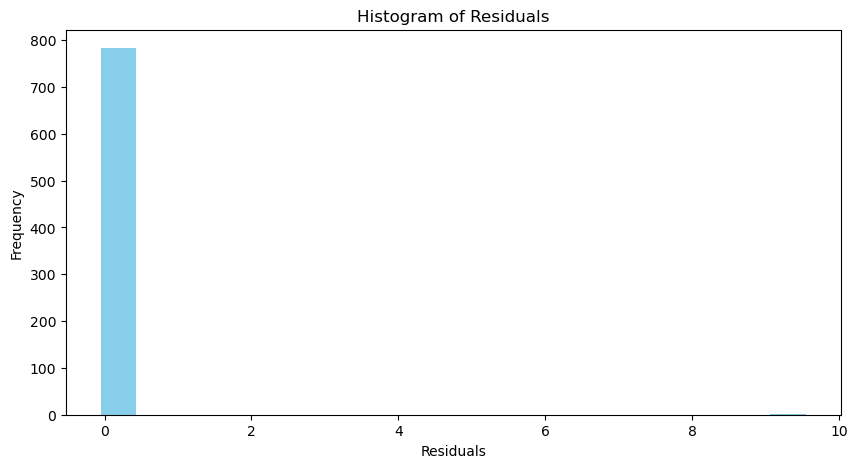

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                1068.90
Distribution:                  Normal   AIC:                          -2131.79
Method:            Maximum Likelihood   BIC:                          -2117.80
                                        No. Observations:                  784
Date:                Sat, Jul 13 2024   Df Residuals:                      783
Time:                        18:02:03   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         4.7284e-04  2.317e-04      2.041  4.127e-02 [1.

In [49]:

# Assuming residuals are already obtained from the ARIMA model fitting
residuals2021 = model2021_fit.resid

# Q-Q Plot
plt.figure(figsize=(10, 5))
stats.probplot(residuals2021, dist='norm', plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()
# Assuming residuals are stored in the variable 'residuals'



# Histogram of Residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals2021, bins=20, color='skyblue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# ARCH Test
arch_model_instance = arch_model(residuals2021, vol='ARCH', p=1)
arch_fit = arch_model_instance.fit(disp='off')
print(arch_fit.summary())

# Extracting the p-value of the ARCH test
arch_test_pvalue = arch_fit.conditional_volatility
print(f'ARCH Test p-value: {arch_test_pvalue}')

<Figure size 1000x500 with 0 Axes>

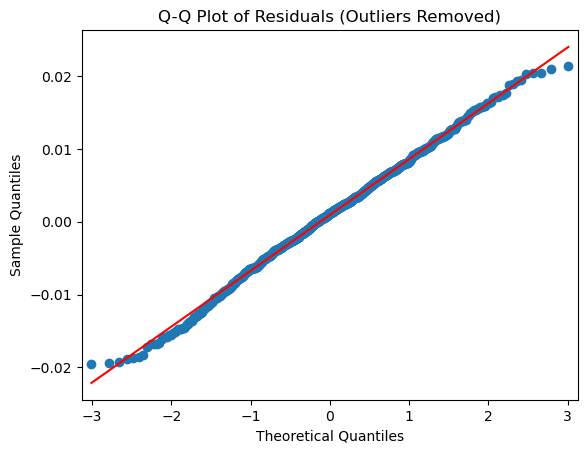

In [51]:
import statsmodels.api as sm

# Assuming residuals are stored in the variable 'residuals'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(residuals2021, 25)
Q3 = np.percentile(residuals2021, 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_residuals = residuals2021[(residuals2021 >= lower_bound) & (residuals2021 <= upper_bound)]

# Plot the Q-Q plot of the filtered residuals
plt.figure(figsize=(10, 5))
sm.qqplot(filtered_residuals, line='s')
plt.title('Q-Q Plot of Residuals (Outliers Removed)')
plt.show()


In [52]:
#fitting the best GARCH model

garch_model = arch_model(filtered_residuals, vol='Garch', p=int(p_garch), q=int(q_garch))
garch_fit = garch_model.fit(disp='off')

print(garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2638.37
Distribution:                  Normal   AIC:                          -5258.73
Method:            Maximum Likelihood   BIC:                          -5217.05
                                        No. Observations:                  759
Date:                Sat, Jul 13 2024   Df Residuals:                      758
Time:                        18:06:58   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         9.5307e-04  2.202e-05     43.283      0.000 [9.

C:\Users\divya\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.886e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [53]:
from sklearn.metrics import mean_absolute_error

# Assuming `train` and `residuals` are already defined from the previous ARIMA-GARCH fitting process

# Calculate residuals MAE
mae_residuals = mean_absolute_error(np.zeros_like(filtered_residuals),filtered_residuals)

# Calculate lagged actual values and differenced series
nifty_log_returns = np.diff(np.log(nifty2021['Close']))
lagged_actual = np.roll(nifty_log_returns, 1)
differenced_series = np.abs(nifty_log_returns - lagged_actual)
differenced_series = differenced_series[1:]  # Remove the first NA value

# Calculate MAE of differenced series
mae_differenced = np.mean(differenced_series)

# Calculate MASE
mase = mae_residuals / mae_differenced
print(f"MASE for Garch Model: {mase}")

# Calculate AIC for ARIMA model
aic_arima = model2021_fit.aic

# Calculate AIC for GARCH model
aic_garch = garch_fit.aic

# Compare AIC values
is_garch_better = aic_garch < aic_arima
print(is_garch_better)

# As ARIMA-GARCH model had a lower AIC than ARIMA model, we conclude that ARIMA-GARCH model is superior in capturing volatility


MASE for Garch Model: 0.6805056083317088
True


# LSTM MODEL

In [54]:
# Function to normalize data using Min-Max scaling
def normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = (data - min_val) / (max_val - min_val)
    return {"data": normalized_data, "min_val": min_val, "max_val": max_val}

# Function to create sequences
def create_sequences(data, length):
    X, y = [], []
    for i in range(length, len(data)):
        X.append(data[i - length:i])
        y.append(data[i])
    X = np.array(X).reshape(len(X), length, 1)
    y = np.array(y)
    return {"X": X, "y": y}

In [55]:
!pip install tensorflow

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to create and compile the LSTM model
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))

    model.compile(
        loss='mean_squared_error',
        optimizer='adam'
    )
    
    return model

In [57]:
# Normalize train and test data
normalized_train = normalize(train21)
normalized_test = normalize(test21)

# Use normalized data to create sequences
sequence_length = 47  # Window size
train_sequences = create_sequences(normalized_train["data"], sequence_length)
test_sequences = create_sequences(normalized_test["data"], sequence_length)

# Define and compile the LSTM model
input_shape = (sequence_length, 1)
modelLS = create_model(input_shape)
modelLS.summary()

C:\Users\divya\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 47, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Train the LSTM model
history = modelLS.fit(
    x = train_sequences["X"],
    y = train_sequences["y"],
    epochs = 100,
    batch_size = 32,
    validation_split = 0.2,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)],
    verbose = 1
)

# Evaluate the model
evaluation = modelLS.evaluate(
    x = test_sequences["X"],
    y = test_sequences["y"]
)
print("Test Loss:", evaluation)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.1130 - val_loss: 0.0513
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0075 - val_loss: 0.0104
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0033 - val_loss: 0.0080
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0026 - val_loss: 0.0046
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step

In [59]:
# Make predictions
predictionsLSTM = modelLS.predict(test_sequences["X"])

# Function to denormalize data
def denormalize(data, min_val, max_val):
    denormalized_data = data * (max_val - min_val) + min_val
    return denormalized_data

# Denormalize predictions and actual values\
predicted_denormalized = denormalize(predictionsLSTM, normalized_test["min_val"], normalized_test["max_val"])
actual_denormalized = denormalize(test_sequences["y"], normalized_test["min_val"], normalized_test["max_val"])


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step


In [60]:
# Calculate evaluation metrics
maeLS = np.mean(np.abs(predicted_denormalized - actual_denormalized))
mseLS = np.mean((predicted_denormalized - actual_denormalized)**2)
rmseLS = np.sqrt(mseLS)

# Calculate MASE
mean_abs_residual = np.mean(np.abs(predicted_denormalized - actual_denormalized))
naive_forecast = actual_denormalized[-1]  # assuming the last value is the forecasted value
naive_residuals = actual_denormalized[1:] - naive_forecast
scale = np.mean(np.abs(naive_residuals))
maseLS = mean_abs_residual / scale

# Calculate R2 score
r2 = r2_score(actual_denormalized, predicted_denormalized)
print("R2 Score for LSTM:", r2)

# Print evaluation metrics
print("MAE for LSTM:", maeLS)
print("MSE for LSTM:", mseLS)
print("RMSE for LSTM:", rmseLS)
print("MASE for LSTM:", maseLS)


R2 Score for LSTM: 0.8337171817909852
MAE for LSTM: 0.03399646265850268
MSE for LSTM: 0.0017535684443555312
RMSE for LSTM: 0.04187563067412276
MASE for LSTM: 0.7579103472064137


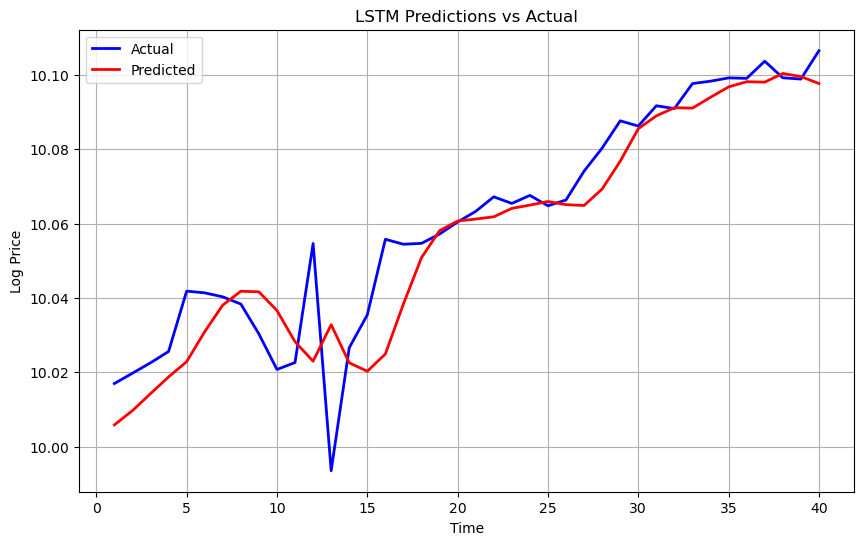

In [61]:
# Prepare results for plotting
time = np.arange(1, len(test_sequences["y"]) + 1)

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(time, actual_denormalized, label='Actual', color='blue', linewidth=2)
plt.plot(time, predicted_denormalized, label='Predicted', color='red', linewidth=2)
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Log Price')
plt.legend()
plt.grid(True)
plt.show()

# LSTM using ACF

ACF values: [ 1.          0.16765896  0.16688848  0.08099253  0.07499353  0.09758235
  0.08485499 -0.0107027   0.09671314  0.05319708  0.01002643  0.06277971
  0.07654579  0.00244536  0.04860978  0.00816383  0.0807767   0.14538492
  0.10750067]
Max correlation observed for lag of 1 days


C:\Users\divya\AppData\Local\Temp\ipykernel_6800\874652624.py:16: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(acf_values)), acf_values, use_line_collection=True)


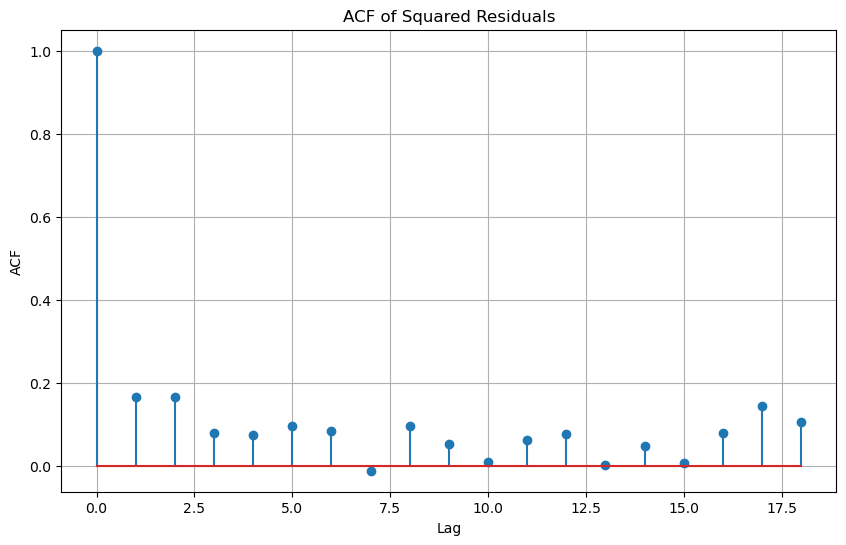

In [98]:
from statsmodels.tsa.stattools import acf

# Calculate squared residuals
sq_residuals = filtered_residuals**2

# Calculate ACF for squared residuals
acf_values = acf(sq_residuals, nlags=18)
print("ACF values:", acf_values)

# Determine the lag with the maximum correlation (excluding the 0 lag)
max_lag = np.argmax(acf_values[1:]) + 1
print("Max correlation observed for lag of", max_lag, "days")

# Plot ACF values
plt.figure(figsize=(10, 6))
plt.stem(range(len(acf_values)), acf_values, use_line_collection=True)
plt.title('ACF of Squared Residuals')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

In [99]:
seq_length = 15  # Window size
train_seq = create_sequences(normalized_train["data"], seq_length)
test_seq = create_sequences(normalized_test["data"], seq_length)


In [100]:
# Define input shape
input_shape = (sequence_length, 1)

# Create and compile the LSTM model
model = create_model(input_shape)

# Print model summary
model.summary()

C:\Users\divya\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 47, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
from tensorflow.keras.callbacks import EarlyStopping

# Train the LSTM model
history = model.fit(
    x=train_seq["X"],
    y=train_seq["y"],
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10)],
    verbose=1
)

# Evaluate the model
evaluation = model.evaluate(
    x=test_seq["X"],
    y=test_seq["y"]
)
print(f"Test Loss: {evaluation}")


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0787 - val_loss: 0.0462
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0069 - val_loss: 0.0097
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0027 - val_loss: 0.0040
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0024 - val_loss: 0.0027
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0018 - val_loss: 9.8307e-04
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0018 - val_loss: 9.3052e-04
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0018 - val_loss: 9.2821e-04
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


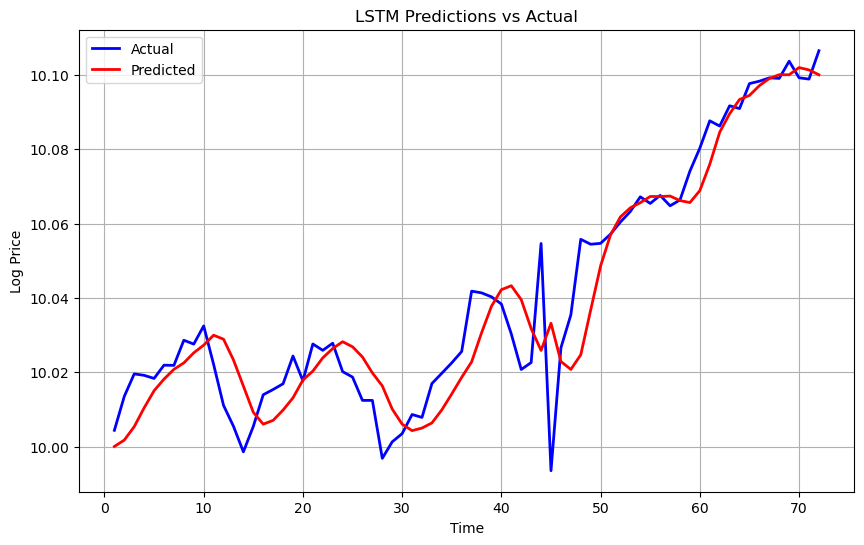

R2 Score for LSTM: 0.8834797139162904
MAE for LSTM using ACF: 0.007872309067289985
MSE for LSTM using ACF: 0.00011889653941265848
RMSE for LSTM using ACF: 0.010903968975224502
MASE for LSTM using ACF: 0.5301279184500415


In [102]:
# Make predictions
predictions = model.predict(test_seq["X"])

# Denormalize function
def denormalize(data, min_val, max_val):
    return data * (max_val - min_val) + min_val

# Denormalize predictions and actual values
predicted_denormalized = denormalize(predictions, normalized_test["min_val"], normalized_test["max_val"])
actual_denormalized = denormalize(test_seq["y"], normalized_test["min_val"], normalized_test["max_val"])

# Combine actual and predicted values into a DataFrame for plotting
results = pd.DataFrame({
    "time": np.arange(1, len(test_seq["y"]) + 1),
    "actual": actual_denormalized.flatten(),
    "predicted": predicted_denormalized.flatten()
})

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(results["time"], results["actual"], label='Actual', color='blue', linewidth=2)
plt.plot(results["time"], results["predicted"], label='Predicted', color='red', linewidth=2)
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Log Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate MAE, MSE, RMSE using denormalized values
mae = mean_absolute_error(actual_denormalized, predicted_denormalized)
mse = mean_squared_error(actual_denormalized, predicted_denormalized)
rmse = np.sqrt(mse)

# Calculate MASE for LSTM
mean_abs_residual = np.mean(np.abs(predicted_denormalized - actual_denormalized))
naive_forecast = actual_denormalized[-1]  # assuming the last value is the forecasted value
naive_residuals = actual_denormalized[1:] - naive_forecast
scale = np.mean(np.abs(naive_residuals))
mase = mean_abs_residual / scale

# Calculate R2 score
r2 = r2_score(actual_denormalized, predicted_denormalized)
print("R2 Score for LSTM:", r2)
print(f"MAE for LSTM using ACF: {mae}")
print(f"MSE for LSTM using ACF: {mse}")
print(f"RMSE for LSTM using ACF: {rmse}")
print(f"MASE for LSTM using ACF: {mase}")

# ARIMA-LSTM Model using Random Forest

In [103]:
#ARIMA LSTM Model using Random Forest Technique
# Function to create lagged data frame
# Function to create lagged data frame
def create_lagged_df(series, max_lag):
    data = {}
    for i in range(1, max_lag + 1):
        data[f"lag_{i}"] = np.concatenate([np.full(i, np.nan), series[:-i]])
    data["t"] = series
    lagged_df = pd.DataFrame(data).dropna()
    return lagged_df


In [104]:
# Create lagged data frame with maximum lag of 20
max_lag = 20
lagged_df = create_lagged_df(sq_residuals, max_lag)

# Separate features (X) and target (y)
X = lagged_df.iloc[:, :-1]
y = lagged_df["t"]

print(X.head())
print(y.head())

                   lag_1     lag_2     lag_3     lag_4     lag_5     lag_6  \
Date                                                                         
2021-02-04  1.074271e-04  0.000457  0.000154  0.000110  0.000073  0.000169   
2021-02-05  1.090895e-04  0.000107  0.000457  0.000154  0.000110  0.000073   
2021-02-08  1.630492e-06  0.000109  0.000107  0.000457  0.000154  0.000110   
2021-02-09  1.136119e-04  0.000002  0.000109  0.000107  0.000457  0.000154   
2021-02-10  3.082550e-07  0.000114  0.000002  0.000109  0.000107  0.000457   

               lag_7     lag_8     lag_9    lag_10    lag_11    lag_12  \
Date                                                                     
2021-02-04  0.000015  0.000041  0.000301  0.000095  0.000145  0.000004   
2021-02-05  0.000169  0.000015  0.000041  0.000301  0.000095  0.000145   
2021-02-08  0.000073  0.000169  0.000015  0.000041  0.000301  0.000095   
2021-02-09  0.000110  0.000073  0.000169  0.000015  0.000041  0.000301   
2021-02-1

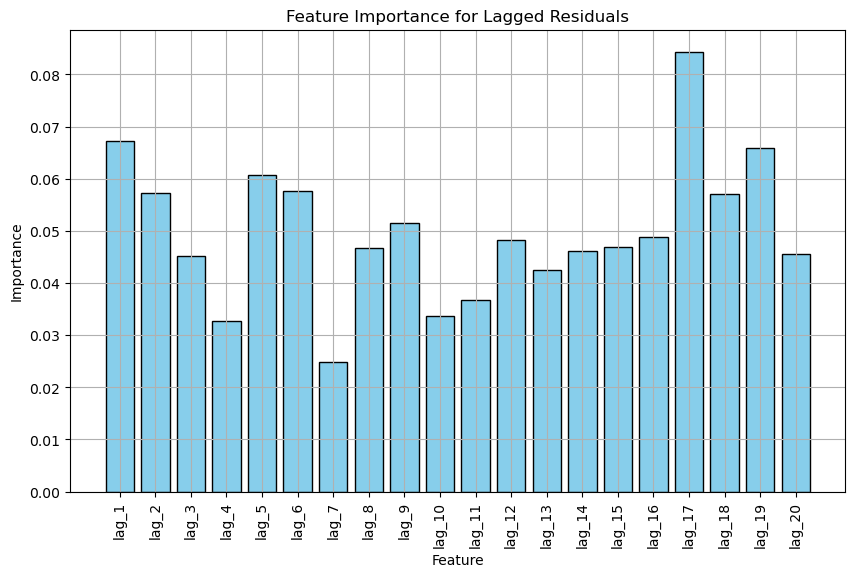

In [105]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
rf_model.fit(X, y)

# Get the feature importances
importance_scores = rf_model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance_scores)), importance_scores, color='skyblue', edgecolor='k')
plt.xticks(range(len(importance_scores)), feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for Lagged Residuals')
plt.grid(True)
plt.show()

In [106]:
# Normalize train and test data
normalized_train = normalize(train)
normalized_test = normalize(test)

# Use normalized data to create sequences
sequence_length = 50  # Window size
train_sequences = create_sequences(normalized_train["data"], sequence_length)
test_sequences = create_sequences(normalized_test["data"], sequence_length)

# Define and compile the LSTM model
input_shape = (sequence_length, 1)
model = create_model(input_shape)

# Print the model summary
model.summary()

C:\Users\divya\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
# Train the LSTM model
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    x=train_sequences["X"],
    y=train_sequences["y"],
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
evaluation = model.evaluate(
    x=test_sequences["X"],
    y=test_sequences["y"]
)
print(f"Test Loss: {evaluation}")

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0684 - val_loss: 3.4495e-04
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0037 - val_loss: 5.8564e-04
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0015 - val_loss: 2.9143e-04
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0011 - val_loss: 5.2179e-04
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0010 - val_loss: 2.8776e-04
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0010 - val_loss: 3.6366e-04
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0012 - val_loss: 4.2051e-04
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 9.1995e-04 - val_loss: 3.2699e-04
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 8.3671e-04 - val_loss: 5.8627e-04
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 9.9270e-04 - val_loss: 1.7443e-04


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step


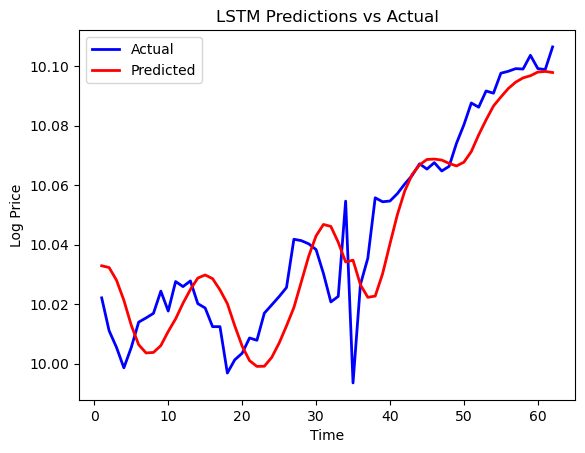

R2 Score for LSTM: 0.8204143395600252
MAE for LSTM using Random Forest: 0.03627998149901998
MSE for LSTM using Random Forest: 0.002045098150777838
RMSE for LSTM using Random Forest: 0.04522276142362205
MASE for LSTM using Random Forest: 0.5818889601311341


In [108]:


# Make predictions
predictions = model.predict(test_sequences["X"])

predicted_denormalized = denormalize(predictions, normalized_test["min_val"], normalized_test["max_val"])
actual_denormalized = denormalize(test_sequences["y"], normalized_test["min_val"], normalized_test["max_val"])

# Combine actual and predicted values into a DataFrame for plotting
results = pd.DataFrame({
    'time': range(1, len(test_sequences["y"]) + 1),
    'actual': actual_denormalized.flatten(),
    'predicted': predicted_denormalized.flatten()
})

# Plot predictions vs actual
plt.plot(results['time'], results['actual'], label='Actual', color='blue', linewidth=2)
plt.plot(results['time'], results['predicted'], label='Predicted', color='red', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Log Price')
plt.title('LSTM Predictions vs Actual')
plt.legend()
plt.show()

# Calculate MAE, MSE, RMSE using denormalized values
mae = np.mean(np.abs(predicted_denormalized - actual_denormalized))
mse = np.mean((predicted_denormalized - actual_denormalized)**2)
rmse = np.sqrt(mse)

# Calculate MASE
mean_abs_residual = np.mean(np.abs(predicted_denormalized - actual_denormalized))
naive_forecast = actual_denormalized[-1]
naive_residuals = actual_denormalized[1:] - naive_forecast
scale = np.mean(np.abs(naive_residuals))
mase = mean_abs_residual / scale

# Calculate R2 score
r2 = r2_score(actual_denormalized, predicted_denormalized)
print("R2 Score for LSTM:", r2)
print(f"MAE for LSTM using Random Forest: {mae}")
print(f"MSE for LSTM using Random Forest: {mse}")
print(f"RMSE for LSTM using Random Forest: {rmse}")
print(f"MASE for LSTM using Random Forest: {mase}")


# Gradient Tree Boosting 

In [109]:
IIAN_df = pd.read_csv(r"C:\Users\divya\OneDrive\Desktop\Surge files\IIAN Historical Data.csv")
# Reverse the order of rows
IIAN_df = IIAN_df.iloc[::-1].reset_index(drop=True)

# Assuming your DataFrame is named IIAN_df
# Convert 'Date' column to datetime format (if not already)
IIAN_df['Date'] = pd.to_datetime(IIAN_df['Date'], format='%d-%m-%Y')

# Set 'Date' column as the index
IIAN_df.set_index('Date', inplace=True)

IIAN_df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-01-01,73.40,76.32,76.47,68.10,2.00M,-3.38%
2021-01-04,76.30,73.92,76.70,72.75,5.53M,3.95%
2021-01-05,73.40,76.30,76.30,73.23,4.16M,-3.80%
2021-01-06,74.00,73.33,74.83,73.33,1.95M,0.82%
2021-01-07,74.07,75.00,75.23,73.50,1.75M,0.09%


In [110]:
IIAN_df.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2024-06-27,179.83,178.40,182.73,177.55,13.41M,0.64%
2024-06-28,180.54,180.40,183.50,179.64,11.88M,0.39%
2024-07-01,189.34,181.99,190.00,181.00,35.12M,4.87%
2024-07-02,185.05,191.00,191.20,182.00,20.17M,-2.27%
2024-07-03,185.29,189.00,189.70,184.50,15.58M,0.13%


In [111]:
VIX_path = r"C:\Users\divya\OneDrive\Desktop\Surge files\India VIX Historical Data (1).csv"
VIX_df = pd.read_csv(VIX_path)
# Reverse the order of rows
VIX_df = VIX_df.iloc[::-1].reset_index(drop=True)

# Assuming your DataFrame is named VIX_df
# Convert 'Date' column to datetime format (if not already)
VIX_df['Date'] = pd.to_datetime(VIX_df['Date'], format='%d-%m-%Y')

# Set 'Date' column as the index
VIX_df.set_index('Date', inplace=True)

VIX_df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-01-01,19.560,21.095,21.3325,19.2625,NaN,-7.28%
2021-01-04,20.030,19.560,21.0275,19.3350,NaN,2.40%
2021-01-05,20.460,20.030,21.0050,20.0300,NaN,2.15%
2021-01-06,20.995,20.460,21.6300,20.4250,NaN,2.61%
2021-01-07,20.615,20.995,20.9950,20.1375,NaN,-1.81%


In [112]:
VIX_df.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2024-06-27,14.1525,14.0450,14.6100,13.9150,NaN,0.77%
2024-06-28,13.8025,14.1525,14.2900,13.6875,NaN,-2.47%
2024-07-01,13.8300,13.8025,14.2275,13.7925,NaN,0.20%
2024-07-02,13.6400,13.8300,14.0125,13.3225,NaN,-1.37%
2024-07-03,13.2050,13.6400,13.7150,12.8700,NaN,-3.19%


In [113]:
print(VIX_df)

              Price     Open     High      Low  Vol. Change %
Date                                                         
2021-01-01  19.5600  21.0950  21.3325  19.2625   NaN   -7.28%
2021-01-04  20.0300  19.5600  21.0275  19.3350   NaN    2.40%
2021-01-05  20.4600  20.0300  21.0050  20.0300   NaN    2.15%
2021-01-06  20.9950  20.4600  21.6300  20.4250   NaN    2.61%
2021-01-07  20.6150  20.9950  20.9950  20.1375   NaN   -1.81%
...             ...      ...      ...      ...   ...      ...
2024-06-27  14.1525  14.0450  14.6100  13.9150   NaN    0.77%
2024-06-28  13.8025  14.1525  14.2900  13.6875   NaN   -2.47%
2024-07-01  13.8300  13.8025  14.2275  13.7925   NaN    0.20%
2024-07-02  13.6400  13.8300  14.0125  13.3225   NaN   -1.37%
2024-07-03  13.2050  13.6400  13.7150  12.8700   NaN   -3.19%

[868 rows x 6 columns]


In [114]:
OIL_df = pd.read_csv(r"C:\Users\divya\OneDrive\Desktop\Surge files\OILI Historical Data.csv")
# Reverse the order of rows
OIL_df = OIL_df.iloc[::-1].reset_index(drop=True)

# Assuming your DataFrame is named IIAN_df
# Convert 'Date' column to datetime format (if not already)
OIL_df['Date'] = pd.to_datetime(OIL_df['Date'], format='%d-%m-%Y')

# Set 'Date' column as the index
OIL_df.set_index('Date', inplace=True)

OIL_df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-01-01,72.47,73.00,73.00,71.87,174.04K,1.22%
2021-01-04,74.90,73.50,75.10,73.33,347.31K,3.35%
2021-01-05,74.63,75.33,76.63,73.33,315.45K,-0.36%
2021-01-06,75.33,76.33,77.20,74.83,381.93K,0.94%
2021-01-07,75.13,76.00,76.67,74.97,149.34K,-0.27%


In [115]:
OIL_df.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2024-06-27,471.73,472.37,476.20,465.07,251.98K,0.74%
2024-06-28,481.83,474.67,495.53,473.37,765.68K,2.14%
2024-07-01,476.00,489.70,489.70,470.23,264.05K,-1.21%
2024-07-02,485.20,481.60,510.95,481.00,874.29K,1.93%
2024-07-03,494.60,493.60,499.00,479.70,194.14K,1.94%


In [116]:
nifty2021.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,13996.099609,14049.849609,13991.349609,14018.500000,14018.500000,358100
2021-01-04,14104.349609,14147.950195,13953.750000,14132.900391,14132.900391,495000
2021-01-05,14075.150391,14215.599609,14048.150391,14199.500000,14199.500000,492500
2021-01-06,14240.950195,14244.150391,14039.900391,14146.250000,14146.250000,632300
2021-01-07,14253.750000,14256.250000,14123.099609,14137.349609,14137.349609,559200


In [117]:
nifty2021.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-08,24329.449219,24344.599609,24240.550781,24320.550781,24320.550781,266300
2024-07-09,24351.000000,24443.599609,24331.900391,24433.199219,24433.199219,250500
2024-07-10,24459.849609,24461.050781,24141.800781,24324.449219,24324.449219,292300
2024-07-11,24396.550781,24402.650391,24193.750000,24315.949219,24315.949219,306400
2024-07-12,24387.949219,24592.199219,24331.150391,24502.150391,24502.150391,325800


In [118]:
print(nifty2021)

                    Open          High           Low         Close  \
Date                                                                 
2021-01-01  13996.099609  14049.849609  13991.349609  14018.500000   
2021-01-04  14104.349609  14147.950195  13953.750000  14132.900391   
2021-01-05  14075.150391  14215.599609  14048.150391  14199.500000   
2021-01-06  14240.950195  14244.150391  14039.900391  14146.250000   
2021-01-07  14253.750000  14256.250000  14123.099609  14137.349609   
...                  ...           ...           ...           ...   
2024-07-08  24329.449219  24344.599609  24240.550781  24320.550781   
2024-07-09  24351.000000  24443.599609  24331.900391  24433.199219   
2024-07-10  24459.849609  24461.050781  24141.800781  24324.449219   
2024-07-11  24396.550781  24402.650391  24193.750000  24315.949219   
2024-07-12  24387.949219  24592.199219  24331.150391  24502.150391   

               Adj Close  Volume  
Date                              
2021-01-01  14018.5

In [119]:
# Extract Price and Close columns and merge into a new DataFrame
merged_df = pd.DataFrame({
    'VIX_Price': VIX_df['Price'],
    'Nifty_Close': nifty2021['Close'],
    'IIAN_Price': IIAN_df['Price'],
    'OIL_Price': OIL_df['Price']
})
# Drop rows with NaN values
merged_df.dropna(inplace=True)

print(merged_df)

            VIX_Price   Nifty_Close  IIAN_Price  OIL_Price
Date                                                      
2021-01-01    19.5600  14018.500000       73.40      72.47
2021-01-04    20.0300  14132.900391       76.30      74.90
2021-01-05    20.4600  14199.500000       73.40      74.63
2021-01-06    20.9950  14146.250000       74.00      75.33
2021-01-07    20.6150  14137.349609       74.07      75.13
...               ...           ...         ...        ...
2024-06-27    14.1525  24044.500000      179.83     471.73
2024-06-28    13.8025  24010.599609      180.54     481.83
2024-07-01    13.8300  24141.949219      189.34     476.00
2024-07-02    13.6400  24123.849609      185.05     485.20
2024-07-03    13.2050  24286.500000      185.29     494.60

[864 rows x 4 columns]


In [120]:
!pip install xgboost

In [121]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


Mean Squared Error: 76410.50193832375
R2 Score: 0.9870255867108301


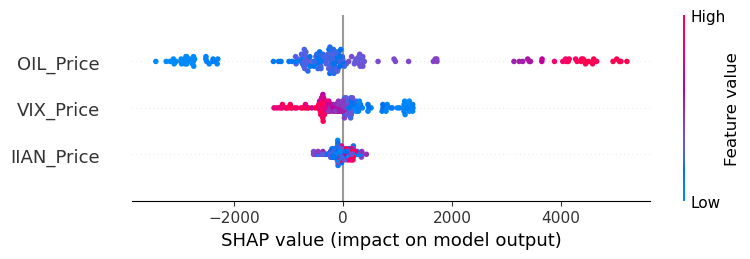

In [122]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import shap

# Define features and target variable
X = merged_df[['VIX_Price' , 'IIAN_Price' , 'OIL_Price']]
y = merged_df['Nifty_Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting model
model = XGBRegressor()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

# Feature importance using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

# Forecasting 2 months stock return prices

In [123]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming OIL_df['Price'] is already defined with historical price data
price_data = OIL_df['Price'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(price_data)


In [124]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define sequence length
sequence_length = 30  # Adjust as needed based on your data and model requirements

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Reshape X to be 3D (samples, sequence length, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential([
    LSTM(units=100, return_sequences=False, input_shape=(sequence_length, 1)),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X, y, epochs=100, batch_size=32)


Epoch 1/100


C:\Users\divya\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0343
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.9816e-04
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.9248e-04
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.3396e-04
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.1499e-04
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.1994e-04
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.3757e-04
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.7863e-04
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.7819e-04
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.4394e-04
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.5895e-04
Epoch 13/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.0395e-04
Epoch 14/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.2070e-04
Epoch 15/100
27/27 ━━

In [126]:
# Generate the forecast for the next 2 months (approximately 60 days)
forecast_length = 60
forecast = []

# Start with the last sequence from the data
current_sequence = X[-1]

for _ in range(forecast_length):
    # Reshape the current sequence for prediction
    current_sequence = current_sequence.reshape((1, sequence_length, 1))
    
    # Predict the next price
    next_price = model.predict(current_sequence)
    
    # Append the predicted price to the forecast
    forecast.append(next_price[0, 0])
    
    # Update the current sequence to include the predicted price
    current_sequence = np.roll(current_sequence, -1, axis=1)
    current_sequence[0, -1] = next_price[0, 0]

# Inverse transform to get the actual prices
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━

In [127]:
# Generate date range for the forecast
forecast_dates = pd.date_range(start='2024-07-04', periods=forecast_length, freq='B')  # 'B' for business days

# Create DataFrame for the forecasted values
yes_done_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Price': forecast
})

# Set 'Date' as the index
yes_done_df.set_index('Date', inplace=True)

# Display the resulting DataFrame
print(yes_done_df)


            Forecasted_Price
Date                        
2024-07-04        488.036926
2024-07-05        491.849915
2024-07-08        495.406372
2024-07-09        498.671661
2024-07-10        501.667114
2024-07-11        504.461792
2024-07-12        507.150177
2024-07-15        509.822021
2024-07-16        512.544861
2024-07-17        515.355042
2024-07-18        518.255737
2024-07-19        521.250122
2024-07-22        524.303284
2024-07-23        527.370972
2024-07-24        530.419556
2024-07-25        533.422546
2024-07-26        536.355225
2024-07-29        539.214294
2024-07-30        542.003784
2024-07-31        544.733582
2024-08-01        547.423401
2024-08-02        550.086731
2024-08-05        552.738098
2024-08-06        555.379761
2024-08-07        558.014404
2024-08-08        560.638672
2024-08-09        563.246033
2024-08-12        565.828735
2024-08-13        568.378418
2024-08-14        570.893311
2024-08-15        573.368225
2024-08-16        575.803162
2024-08-19    

In [128]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming nifty and OIL_df['Price'] are already defined
# Convert OIL_df['Price'] to a DataFrame if it's a Series
if isinstance(merged_df['OIL_Price'], pd.Series):
    oil_prices = pd.DataFrame(merged_df['OIL_Price'])
else:
    oil_prices = merged_df['OIL_Price'].copy()

# Align indices if necessary
oil_prices.index = pd.to_datetime(oil_prices.index)

# Ensure both datasets have the same frequency and align the dates
merged_df.index = pd.to_datetime(merged_df.index)
oil_prices = oil_prices.reindex(merged_df.index, method='ffill')

# Prepare the data for modeling
X = oil_prices.values.reshape(-1, 1)  # Features (independent variable)
y = merged_df['Nifty_Close'].values  # Target (dependent variable)

# Split data into training and testing sets (not necessary for forecasting)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [129]:
# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Fit the model
gbr.fit(X, y)

# Predict using the model
y_forecast = gbr.predict(X)  # You can use this for training evaluation if needed


In [130]:
# Assuming you have already generated the `forecast_dates` for the upcoming 2 months
# Create DataFrame for the forecasted values
yes_done_df['NIFTY_Forecast'] = np.nan  # Initialize a new column for NIFTY forecast

# Fill the forecasted NIFTY values into yes_done_df based on forecast_dates
for date, forecast_value in zip(forecast_dates, gbr.predict(X[-len(forecast_dates):].reshape(-1, 1))):
    yes_done_df.loc[date, 'NIFTY_Forecast'] = forecast_value

# Display the resulting DataFrame
print(yes_done_df)


            Forecasted_Price  NIFTY_Forecast
Date                                        
2024-07-04        488.036926    22435.457609
2024-07-05        491.849915    22467.076197
2024-07-08        495.406372    22500.863262
2024-07-09        498.671661    22467.076197
2024-07-10        501.667114    22467.076197
2024-07-11        504.461792    22461.064394
2024-07-12        507.150177    22435.457609
2024-07-15        509.822021    22435.457609
2024-07-16        512.544861    22194.142186
2024-07-17        515.355042    22194.142186
2024-07-18        518.255737    22194.142186
2024-07-19        521.250122    22194.142186
2024-07-22        524.303284    22461.064394
2024-07-23        527.370972    22461.064394
2024-07-24        530.419556    22467.076197
2024-07-25        533.422546    22435.457609
2024-07-26        536.355225    22435.457609
2024-07-29        539.214294    22467.076197
2024-07-30        542.003784    22467.076197
2024-07-31        544.733582    22467.076197
2024-08-01

In [131]:
# Assuming merged_df is your dataframe containing 'VIX_Price', 'Nifty_Close', 'IIAN_Price', and 'OIL_Price'
columns_to_drop = ['VIX_Price', 'IIAN_Price']
merged_df.drop(columns=columns_to_drop, inplace=True)



In [132]:
original_df = merged_df.copy()
forecasted_df = yes_done_df.copy()

In [133]:
merged_df

,Nifty_Close,OIL_Price
Date,,
2021-01-01,14018.500000,72.47
2021-01-04,14132.900391,74.90
2021-01-05,14199.500000,74.63
2021-01-06,14146.250000,75.33
2021-01-07,14137.349609,75.13
...,...,...
2024-06-27,24044.500000,471.73
2024-06-28,24010.599609,481.83
2024-07-01,24141.949219,476.00


In [134]:
yes_done_df.rename(columns={'Forecasted_Price': 'OIL_Price', 'NIFTY_Forecast': 'Nifty_Close'}, inplace=True)
yes_done_df

,OIL_Price,Nifty_Close
Date,,
2024-07-04,488.036926,22435.457609
2024-07-05,491.849915,22467.076197
2024-07-08,495.406372,22500.863262
2024-07-09,498.671661,22467.076197
2024-07-10,501.667114,22467.076197
2024-07-11,504.461792,22461.064394
2024-07-12,507.150177,22435.457609
2024-07-15,509.822021,22435.457609
2024-07-16,512.544861,22194.142186


In [135]:
# Merging the dataframes
final_df = pd.concat([merged_df, yes_done_df])

print(final_df)

             Nifty_Close   OIL_Price
Date                                
2021-01-01  14018.500000   72.470000
2021-01-04  14132.900391   74.900000
2021-01-05  14199.500000   74.630000
2021-01-06  14146.250000   75.330000
2021-01-07  14137.349609   75.130000
...                  ...         ...
2024-09-19  23998.892536  624.245605
2024-09-20  24016.513041  625.855225
2024-09-23  24016.513041  627.433228
2024-09-24  24043.593921  628.979736
2024-09-25  24124.369423  630.495361

[924 rows x 2 columns]


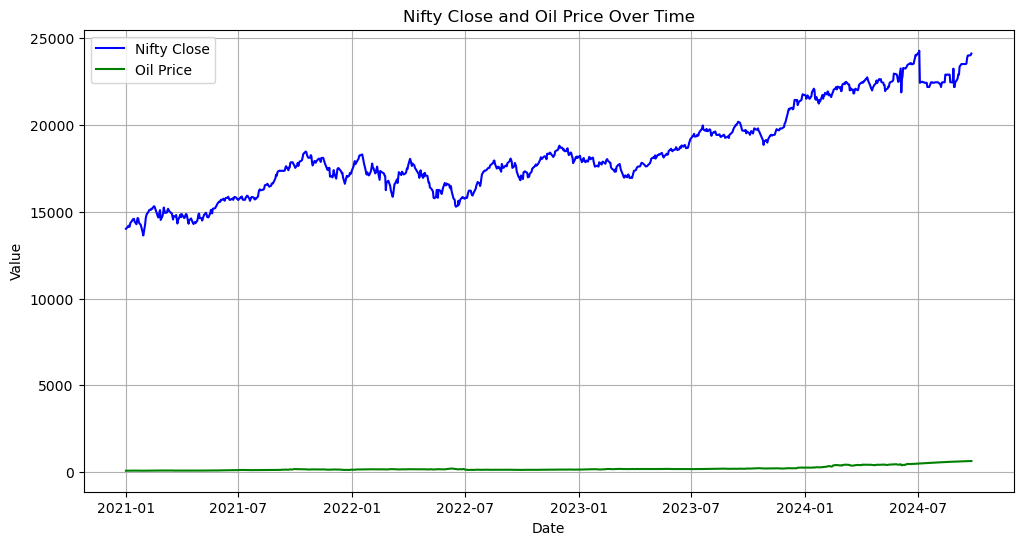

In [137]:
# Plotting the data
plt.figure(figsize=(12, 6))

# Plot Nifty_Close
plt.plot(final_df.index, final_df['Nifty_Close'], label='Nifty Close', color='b')

# Plot OIL_Price
plt.plot(final_df.index, final_df['OIL_Price'], label='Oil Price', color='g')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Nifty Close and Oil Price Over Time')
plt.legend()
plt.grid(True)
plt.show()